# Logestic Regression Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)

### Reading Data

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\archive\bank-additional-full.csv",sep = ";")
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.shape

(41188, 21)

### Data Preparation 

In [5]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [6]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [7]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [8]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [9]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
data.y.value_counts(normalize = True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [11]:
data.y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [12]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [15]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [16]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [17]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking Null Values

In [19]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
data['y'] = data['y'].apply(lambda y:1 if y=="yes" else 0)

In [21]:
data['default'] = data['default'].apply(lambda default:1 if default=="yes" else 0)

In [22]:
data['housing'] = data['housing'].apply(lambda housing:1 if housing=="yes" else 0)

In [23]:
data['loan'] = data['loan'].apply(lambda loan:1 if loan=="yes" else 0)

In [24]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,0,0,0,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,0,0,0,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,0,1,0,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Creating Dummy Variables Of Object Columns

In [25]:
data_dummy = pd.get_dummies(data[['job','marital','education','contact','month','day_of_week','poutcome']],drop_first = True)

In [26]:
data_dummy

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [27]:
x = data.drop(['job','marital','education','contact','month','day_of_week','poutcome'],axis=1)
x

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0,0,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0,1,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0,0,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [28]:
data = x.join(data_dummy)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  int64  
 2   housing                        41188 non-null  int64  
 3   loan                           41188 non-null  int64  
 4   duration                       41188 non-null  int64  
 5   campaign                       41188 non-null  int64  
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

### Checking For Outliers

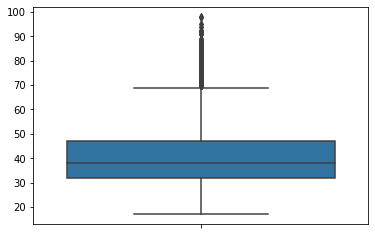

In [30]:
sns.boxplot(y = [data.age])

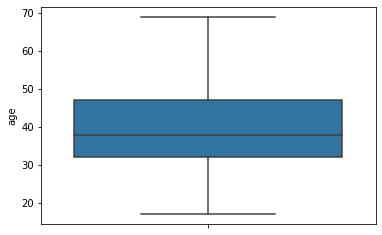

In [31]:
percentile25 = data['age'].quantile(0.25)
percentile75 = data['age'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['age'] < upper_limit]

sns.boxplot(y=data.age)

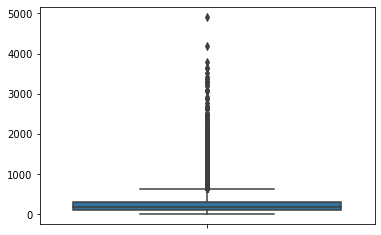

In [32]:
sns.boxplot(y = [data.duration])

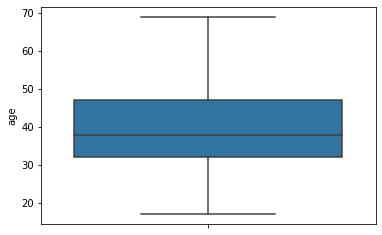

In [33]:
percentile25 = data['duration'].quantile(0.25)
percentile75 = data['duration'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['duration'] < upper_limit]

sns.boxplot(y=data.age)

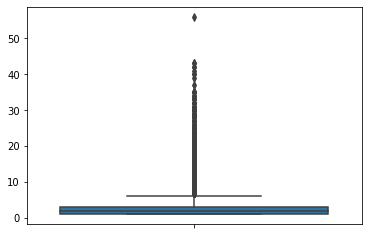

In [34]:
sns.boxplot(y = [data.campaign])

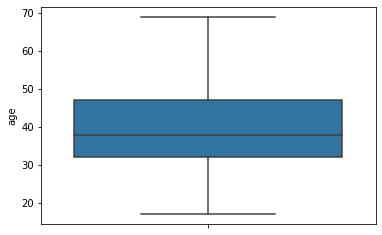

In [35]:
percentile25 = data['campaign'].quantile(0.25)
percentile75 = data['campaign'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['campaign'] < upper_limit]

sns.boxplot(y=data.age)

In [36]:
data.previous.value_counts()

0    29768
1     3988
2      624
3      178
4       55
5       16
6        4
7        1
Name: previous, dtype: int64

In [37]:
data.pdays.value_counts()

999    33383
3        363
6        333
4        105
9         54
2         50
12        48
7         48
10        44
5         37
13        28
1         23
11        22
15        20
14        15
8         14
0         13
16        10
17         8
18         6
22         3
21         2
26         1
19         1
20         1
25         1
27         1
Name: pdays, dtype: int64

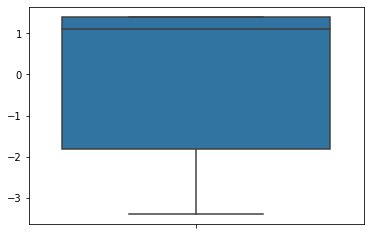

In [38]:
sns.boxplot(y = [data["emp.var.rate"]])

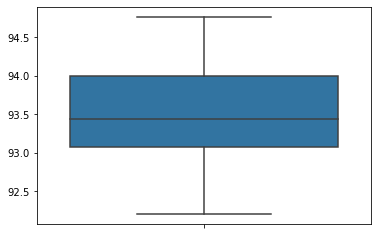

In [39]:
sns.boxplot(y = [data["cons.price.idx"]])

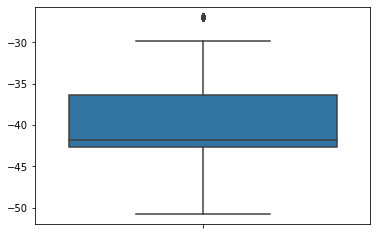

In [40]:
sns.boxplot(y = [data["cons.conf.idx"]])

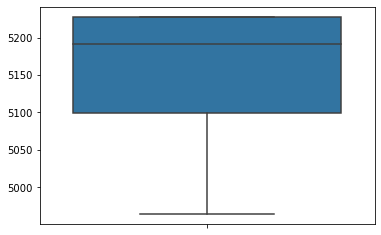

In [41]:
sns.boxplot(y = [data["nr.employed"]])

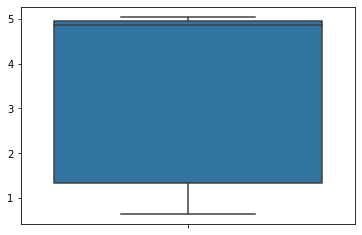

In [42]:
sns.boxplot(y = [data["euribor3m"]])

## MultiColinearity

In [43]:
#code for easily checking highlycorrelated with respect to y(objective) column
cor_matrix = data.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                    age   default   housing      loan  \
age                            1.000000  0.002638  0.006099  0.005819   
default                        0.002638  1.000000  0.003577  0.003926   
housing                        0.006099  0.003577  1.000000  0.054633   
loan                           0.005819  0.003926  0.054633  1.000000   
duration                       0.003258  0.006948  0.010610  0.007967   
campaign                       0.009572  0.005012  0.008119  0.011630   
pdays                          0.003232  0.001802  0.007747  0.001689   
previous                       0.020715  0.002956  0.018617  0.000566   
emp.var.rate                   0.068333  0.004993  0.058109  0.001451   
cons.price.idx                 0.034696  0.003252  0.080120  0.002594   
cons.conf.idx                  0.101310  0.004903  0.036050  0.013014   
euribor3m                      0.081783  0.005851  0.057590  0.001840   
nr.employed                    0.066784  0.006620  

In [44]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print(); print(to_drop)

data = data.drop(to_drop, axis=1)
print(); print(data.head())


['cons.price.idx', 'euribor3m', 'nr.employed', 'marital_single', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success']

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   56        0        0     0       261         1    999         0   
1   57        0        0     0       149         1    999         0   
2   37        0        1     0       226         1    999         0   
3   40        0        0     0       151         1    999         0   
4   56        0        0     1       307         1    999         0   

   emp.var.rate  cons.conf.idx  y  job_blue-collar  job_entrepreneur  \
0           1.1          -36.4  0                0                 0   
1           1.1          -36.4  0                0                 0   
2           1.1          -36.4  0                0                 0   
3           1.1          -36.4  0                0                 0   
4           1.1          -36.4  0                0                 0   

   job_h

In [45]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] < -0.60)]
print(); print(to_drop)

data = data.drop(to_drop, axis=1)
print(); print(data.head())


[]

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   56        0        0     0       261         1    999         0   
1   57        0        0     0       149         1    999         0   
2   37        0        1     0       226         1    999         0   
3   40        0        0     0       151         1    999         0   
4   56        0        0     1       307         1    999         0   

   emp.var.rate  cons.conf.idx  y  job_blue-collar  job_entrepreneur  \
0           1.1          -36.4  0                0                 0   
1           1.1          -36.4  0                0                 0   
2           1.1          -36.4  0                0                 0   
3           1.1          -36.4  0                0                 0   
4           1.1          -36.4  0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   

### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(['y'], axis=1)

X.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,0,261,1,999,0,1.1,-36.4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,57,0,0,0,149,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,37,0,1,0,226,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,1.1,-36.4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,56,0,0,1,307,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [47]:
y = data['y']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Using Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')


num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove('y')

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head(10)

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
27097,0.767058,-0.011125,-1.051526,-0.422633,-0.719664,0.046016,0.194305,-0.358357,-0.097302,-0.324901,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34485,-0.887445,-0.011125,0.950999,2.366121,0.650210,-0.835162,0.194305,-0.358357,-1.180005,-1.227901,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34554,-1.301070,-0.011125,0.950999,-0.422633,-0.855935,-0.835162,0.194305,1.669571,-1.180005,-1.227901,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15809,0.767058,-0.011125,-1.051526,-0.422633,1.073365,-0.835162,0.194305,-0.358357,0.858024,-0.475401,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4151,-0.887445,-0.011125,-1.051526,-0.422633,0.757792,0.046016,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
40092,-0.370413,-0.011125,0.950999,2.366121,0.700415,1.808372,-5.162826,1.669571,-1.116317,0.040598,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
39992,-1.404477,-0.011125,-1.051526,-0.422633,2.801845,1.808372,-5.114418,5.725425,-1.116317,0.148098,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12643,-0.370413,-0.011125,0.950999,-0.422633,0.047752,0.046016,0.194305,-0.358357,0.858024,-0.475401,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4742,0.456838,-0.011125,-1.051526,-0.422633,0.090785,-0.835162,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
19889,-1.094257,-0.011125,-1.051526,-0.422633,2.249592,0.046016,0.194305,-0.358357,0.858024,0.943598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
### Checking the Yes Possibility Rate
y_rate = (sum(data['y'])/len(data['y'].index))*100
y_rate

8.185597967315354

### Checking For Colinearity

In [51]:
data.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,0.002638,-0.006099,-0.005819,0.003258,0.009572,0.003232,-0.020715,0.068333,0.101310,-0.016594,-0.001951,0.042967,0.086260,0.078962,0.333872,0.004019,-0.055364,-0.214930,-0.052487,0.001319,0.050672,0.291000,-0.008145,0.019302,-0.033958,-0.097739,0.012275,0.007164,-0.063083,0.063644,0.066286,0.025913,-0.035901,0.000139,-0.028131,-0.047030,0.036442,0.015668,-0.000560,0.023102,-0.021128,0.015433,-0.027900
default,0.002638,1.000000,-0.003577,-0.003926,-0.006948,-0.005012,0.001802,0.002956,0.004993,0.004903,-0.002779,-0.005044,-0.001801,-0.001498,-0.002593,-0.001694,-0.001760,-0.003046,-0.001399,0.012540,0.018379,-0.000827,0.007514,-0.000384,-0.002255,-0.003893,0.002229,-0.000187,0.015000,-0.006061,-0.001926,0.013482,-0.000582,-0.004122,-0.003534,-0.001080,-0.006705,0.006892,-0.001226,-0.001074,-0.004803,-0.004734,0.018695,-0.004618
housing,-0.006099,-0.003577,1.000000,0.054633,-0.010610,-0.008119,-0.007747,0.018617,-0.058109,-0.036050,0.013472,-0.013890,0.002610,-0.004822,-0.007160,-0.006580,-0.002602,-0.004428,0.001642,0.012209,0.011154,-0.002196,-0.012683,-0.002791,-0.009983,0.002232,-0.006669,-0.001017,0.014348,0.012571,-0.009886,0.027619,0.006578,0.003053,-0.051966,0.011808,-0.028032,0.031698,0.000254,0.008635,0.012699,0.010327,-0.010622,0.001840
loan,-0.005819,-0.003926,0.054633,1.000000,-0.007967,0.011630,0.001689,-0.000566,0.001451,-0.013014,-0.007997,-0.006824,-0.004667,0.000511,-0.000838,-0.007165,-0.009114,-0.002448,0.002994,-0.006245,-0.000928,0.002809,0.005315,0.002129,-0.002111,-0.007417,-0.001869,-0.000459,0.003861,0.012380,-0.012912,0.000130,0.004672,0.010327,-0.005618,-0.002449,0.001519,-0.005716,-0.010125,0.001613,0.007915,-0.003009,-0.008687,-0.003492
duration,0.003258,-0.006948,-0.010610,-0.007967,1.000000,-0.041126,-0.073215,0.045564,-0.054458,-0.004803,0.266464,0.014680,0.000152,-0.001246,-0.002797,0.014709,-0.011559,0.003237,0.023834,-0.018626,-0.002695,-0.007762,-0.005193,0.014144,-0.000957,0.012105,0.006193,-0.002688,-0.009964,-0.019936,0.009071,-0.051155,0.024642,0.013106,-0.027139,0.006001,0.037036,-0.039144,0.012560,0.017196,-0.017330,0.012785,0.009107,0.016528
campaign,0.009572,-0.005012,-0.008119,0.011630,-0.041126,1.000000,0.042168,-0.060103,0.096428,-0.009669,-0.054878,-0.000755,0.004739,-0.004007,-0.006752,0.006436,0.012941,0.000357,-0.020360,-0.000571,-0.010491,-0.005241,-0.000221,-0.006530,0.009722,-0.000474,0.000138,0.002321,0.005743,-0.003417,0.001247,0.018653,-0.001254,0.056108,0.022645,-0.011156,0.008103,-0.059792,-0.051197,-0.027682,0.058974,-0.044256,-0.023992,-0.024442
pdays,0.003232,0.001802,-0.007747,0.001689,-0.073215,0.042168,1.000000,-0.573947,0.265606,-0.089532,-0.380836,0.063171,0.018376,-0.000431,-0.001768,-0.036840,0.016248,0.028258,-0.099300,0.000159,-0.028504,-0.010949,0.036190,-0.006982,0.021202,0.034471,0.000212,0.003893,-0.003563,-0.043221,-0.014477,-0.006806,-0.067343,0.048601,0.011902,-0.086932,0.076177,-0.016088,-0.129761,-0.155715,0.004215,-0.011450,-0.003705,-0.001924
previous,-0.020715,0.002956,0.018617,-0.000566,0.045564,-0.060103,-0.573947,1.000000,-0.419483,-0.061905,0.267610,-0.051519,-0.011321,-0.015607,0.008726,0.021683,-0.010122,-0.007129,0.110838,-0.013644,0.012871,-0.005123,-0.048514,0.007931,-0.019686,-0.023151,0.021991,-0.004255,-0.011247,0.030633,0.016025,-0.049653,0.054505,-0.115849,-0.068514,0.078460,-0.017502,0.085253,0.128326,0.150038,-0.002569,0.002616,-0.001430,-

### Using Stats Model Creating Descriptive Model(Logestic Regression)

In [52]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24199
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3943.4
Date:                Wed, 04 Aug 2021   Deviance:                       7886.8
Time:                        11:15:43   Pearson chi2:                 1.32e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.8382      3.417     -1.123      0.261     -10.535       2.859
age                              -0.0331      0.034     -0.972      0.331      -0.100       0.034
default                          -0.1960    306.649     -0.001      0.999    -601.216     600.824
housing                           0.0040      0.030      0.135      0.893      -0.055       0.063
loan                             -0.0053      0.030     -0.177      0.860      -0.065       0.054
duration                          1.0646      0.029     36.811      0.000       1.008       1.121
campaign                         -0.0446      0.034     -1.329      0.184      -0.110       0.021
pdays                            -0.3908      0.022    -18.045      0.000      -0.433      -0.348
previous                         -0.0376      0.025     -1.476      0.140      -0.087       0.012
emp.var.rate                     -1.2430      0.039    -31.539      0.000      -1.320      -1.166
cons.conf.idx                    -0.0932      0.033     -2.820      0.005      -0.158      -0.028
job_blue-collar                  -0.3984      0.124     -3.212      0.001      -0.641      -0.155
job_entrepreneur                 -0.3590      0.187     -1.919      0.055      -0.726       0.008
job_housemaid                     0.0482      0.223      0.216      0.829      -0.389       0.486
job_management                   -0.1978      0.122     -1.623      0.104      -0.437       0.041
job_retired                       0.4303      0.165      2.604      0.009       0.106       0.754
job_self-employed                -0.2069      0.176     -1.179      0.238      -0.551       0.137
job_services                     -0.2418      0.131     -1.850      0.064      -0.498       0.014
job_student                       0.3894      0.150      2.598      0.009       0.096       0.683
job_technician                   -0.1084      0.103     -1.057      0.291      -0.309       0.093
job_unemployed                    0.0575      0.176      0.327      0.744      -0.287       0.402
job_unknown                      -0.6661      0.401     -1.663      0.096      -1.451       0.119
marital_married                  -0.0649      0.067     -0.967      0.334      -0.196       0.067
marital_unknown                   0.2828      0.506      0.559      0.576      -0.709       1.275
education_basic.6y               -0.0571      0.200     -0.285      0.776      -0.450       0.336
education_basic.9y               -0.1664      0.155     -1.072      0.284      -0.471       0.138
education_high.school             0.0194      0.149      0.130      0.896      -0.272       0.310
education_illiterate            -19.2121   1.35e+04     -0.001      0.999   -2.64e+04    2.64e+04
education_professional.course     0.2209     

In [53]:
X_train.shape

(24243, 43)

### Using RFE For Feature Selection of Significant Columns

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 21),
 ('default', False, 18),
 ('housing', False, 24),
 ('loan', False, 23),
 ('duration', True, 1),
 ('campaign', False, 17),
 ('pdays', True, 1),
 ('previous', False, 19),
 ('emp.var.rate', True, 1),
 ('cons.conf.idx', False, 13),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 20),
 ('job_management', False, 4),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', False, 11),
 ('job_unemployed', False, 15),
 ('job_unknown', True, 1),
 ('marital_married', False, 12),
 ('marital_unknown', True, 1),
 ('education_basic.6y', False, 14),
 ('education_basic.9y', True, 1),
 ('education_high.school', False, 22),
 ('education_illiterate', True, 1),
 ('education_professional.course', False, 7),
 ('education_university.degree', True, 1),
 ('education_unknown', False, 8),
 ('month_aug', False, 3),
 ('month_dec', False, 2),
 ('month_jul', True, 1),
 ('month_j

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['duration', 'pdays', 'emp.var.rate', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_services', 'job_student',
       'job_unknown', 'marital_unknown', 'education_basic.9y',
       'education_illiterate', 'education_university.degree', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['age', 'default', 'housing', 'loan', 'campaign', 'previous',
       'cons.conf.idx', 'job_housemaid', 'job_management', 'job_self-employed',
       'job_technician', 'job_unemployed', 'marital_married',
       'education_basic.6y', 'education_high.school',
       'education_professional.course', 'education_unknown', 'month_aug',
       'month_dec', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24222
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3963.6
Date:                Wed, 04 Aug 2021   Deviance:                       7927.2
Time:                        11:15:50   Pearson chi2:                 1.32e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4801      0.085    -41.055      0.000      -3.646      -3.314
duration                        1.0620      0.029     36.985      0.000       1.006       1.118
pdays                          -0.3778      0.017    -22.415      0.000      -0.411      -0.345
emp.var.rate                   -1.1958      0.035    -33.812      0.000      -1.265      -1.126
job_blue-collar                -0.4053      0.103     -3.947      0.000      -0.606      -0.204
job_entrepreneur               -0.3487      0.181     -1.924      0.054      -0.704       0.007
job_retired                     0.3724      0.138      2.692      0.007       0.101       0.644
job_services                   -0.2467      0.121     -2.036      0.042      -0.484      -0.009
job_student                     0.5396      0.131      4.132      0.000       0.284       0.796
job_unknown                    -0.5617      0.391     -1.437      0.151      -1.328       0.204
marital_unknown                 0.3631      0.508      0.715      0.474      -0.632       1.358
education_basic.9y             -0.2288      0.110     -2.082      0.037      -0.444      -0.013
education_illiterate          -19.1477   1.37e+04     -0.001      0.999   -2.69e+04    2.69e+04
education_university.degree     0.2848      0.069      4.115      0.000       0.149       0.420
month_jul                       0.2859      0.110      2.596      0.009       0.070       0.502
month_jun                       0.1600      0.101      1.578      0.115      -0.039       0.359
month_mar                       1.9962      0.140     14.259      0.000       1.722       2.271
month_may                      -1.1521      0.088    -13.047      0.000      -1.325      -0.979
month_nov                      -0.3957      0.108     -3.677      0.000      -0.607      -0.185
month_oct                       0.5232      0.136      3.850      0.000       0.257       0.790
month_sep                       0.5774      0.152      3.810      0.000       0.280       0.874
===============================================================================================
"""

In [59]:
#probability prediction for y column
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

27097    0.013225
34485    0.047003
34554    0.011540
15809    0.040943
4151     0.009027
40092    0.753923
39992    0.948941
12643    0.009488
4742     0.003493
19889    0.129457
dtype: float64

In [60]:
#reshapping the data frame into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01322486, 0.04700276, 0.01153973, 0.04094277, 0.00902747,
       0.75392329, 0.94894142, 0.00948803, 0.00349301, 0.12945651])

In [61]:
#creating a dataframe for checking the probability with respect to value and giving the index as ID
y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(20)

,y,y_Prob,CustID
0,0,0.013225,27097
1,0,0.047003,34485
2,0,0.011540,34554
3,0,0.040943,15809
4,0,0.009027,4151
5,0,0.753923,40092
6,1,0.948941,39992
7,0,0.009488,12643
8,0,0.003493,4742
9,0,0.129457,19889


In [62]:
#Predicting with model with 0.5 threshold 
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,y,y_Prob,CustID,predicted
0,0,0.013225,27097,0
1,0,0.047003,34485,0
2,0,0.011540,34554,0
3,0,0.040943,15809,0
4,0,0.009027,4151,0
5,0,0.753923,40092,1
6,1,0.948941,39992,1
7,0,0.009488,12643,0
8,0,0.003493,4742,0
9,0,0.129457,19889,0


### Evaluation Of Training Model(Confusion Matrix)

In [63]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)



[[21817   417]
 [ 1246   763]]


In [64]:
#accuracy score
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9314028791816195


### Checking For OverFitting With VIF in model

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.69
16,month_may,1.60
10,education_basic.9y,1.40
12,education_university.degree,1.37
13,month_jul,1.35
2,emp.var.rate,1.33
14,month_jun,1.21
6,job_services,1.19
17,month_nov,1.17
1,pdays,1.13


In [66]:
col = col.drop('education_illiterate', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24223
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.0
Date:                Wed, 04 Aug 2021   Deviance:                       7928.0
Time:                        11:15:51   Pearson chi2:                 1.32e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4811      0.085    -41.066      0.000      -3.647      -3.315
duration                        1.0622      0.029     36.994      0.000       1.006       1.118
pdays                          -0.3779      0.017    -22.420      0.000      -0.411      -0.345
emp.var.rate                   -1.1958      0.035    -33.811      0.000      -1.265      -1.126
job_blue-collar                -0.4059      0.103     -3.954      0.000      -0.607      -0.205
job_entrepreneur               -0.3497      0.181     -1.930      0.054      -0.705       0.006
job_retired                     0.3693      0.138      2.671      0.008       0.098       0.640
job_services                   -0.2465      0.121     -2.034      0.042      -0.484      -0.009
job_student                     0.5397      0.131      4.133      0.000       0.284       0.796
job_unknown                    -0.5618      0.391     -1.437      0.151      -1.328       0.204
marital_unknown                 0.3631      0.508      0.715      0.474      -0.632       1.358
education_basic.9y             -0.2282      0.110     -2.077      0.038      -0.444      -0.013
education_university.degree     0.2852      0.069      4.121      0.000       0.150       0.421
month_jul                       0.2865      0.110      2.602      0.009       0.071       0.502
month_jun                       0.1608      0.101      1.585      0.113      -0.038       0.360
month_mar                       1.9971      0.140     14.265      0.000       1.723       2.272
month_may                      -1.1516      0.088    -13.042      0.000      -1.325      -0.979
month_nov                      -0.3952      0.108     -3.673      0.000      -0.606      -0.184
month_oct                       0.5242      0.136      3.858      0.000       0.258       0.791
month_sep                       0.5782      0.152      3.816      0.000       0.281       0.875
===============================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['y_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9314028791816195


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.69
15,month_may,1.60
10,education_basic.9y,1.40
11,education_university.degree,1.37
12,month_jul,1.35
2,emp.var.rate,1.33
13,month_jun,1.21
6,job_services,1.19
16,month_nov,1.17
1,pdays,1.13


In [69]:
col = col.drop('marital_unknown', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24224
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.2
Date:                Wed, 04 Aug 2021   Deviance:                       7928.5
Time:                        11:15:52   Pearson chi2:                 1.32e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4809      0.085    -41.061      0.000      -3.647      -3.315
duration                        1.0624      0.029     36.999      0.000       1.006       1.119
pdays                          -0.3779      0.017    -22.424      0.000      -0.411      -0.345
emp.var.rate                   -1.1956      0.035    -33.810      0.000      -1.265      -1.126
job_blue-collar                -0.4046      0.103     -3.943      0.000      -0.606      -0.203
job_entrepreneur               -0.3482      0.181     -1.922      0.055      -0.703       0.007
job_retired                     0.3687      0.138      2.667      0.008       0.098       0.640
job_services                   -0.2466      0.121     -2.034      0.042      -0.484      -0.009
job_student                     0.5393      0.131      4.130      0.000       0.283       0.795
job_unknown                    -0.5475      0.391     -1.400      0.162      -1.314       0.219
education_basic.9y             -0.2286      0.110     -2.080      0.037      -0.444      -0.013
education_university.degree     0.2865      0.069      4.142      0.000       0.151       0.422
month_jul                       0.2866      0.110      2.602      0.009       0.071       0.502
month_jun                       0.1612      0.101      1.590      0.112      -0.038       0.360
month_mar                       1.9984      0.140     14.278      0.000       1.724       2.273
month_may                      -1.1510      0.088    -13.036      0.000      -1.324      -0.978
month_nov                      -0.3960      0.108     -3.680      0.000      -0.607      -0.185
month_oct                       0.5261      0.136      3.872      0.000       0.260       0.792
month_sep                       0.5774      0.152      3.810      0.000       0.280       0.874
===============================================================================================
"""

In [70]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['y_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9314441282019552


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.69
14,month_may,1.60
9,education_basic.9y,1.40
10,education_university.degree,1.37
11,month_jul,1.35
2,emp.var.rate,1.33
12,month_jun,1.21
6,job_services,1.19
15,month_nov,1.17
1,pdays,1.13


In [72]:
col = col.drop('job_unknown', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24225
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3965.3
Date:                Wed, 04 Aug 2021   Deviance:                       7930.6
Time:                        11:15:53   Pearson chi2:                 1.31e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4871      0.085    -41.178      0.000      -3.653      -3.321
duration                        1.0628      0.029     37.018      0.000       1.006       1.119
pdays                          -0.3770      0.017    -22.400      0.000      -0.410      -0.344
emp.var.rate                   -1.1954      0.035    -33.813      0.000      -1.265      -1.126
job_blue-collar                -0.3963      0.102     -3.868      0.000      -0.597      -0.196
job_entrepreneur               -0.3428      0.181     -1.893      0.058      -0.698       0.012
job_retired                     0.3761      0.138      2.722      0.006       0.105       0.647
job_services                   -0.2387      0.121     -1.971      0.049      -0.476      -0.001
job_student                     0.5479      0.130      4.200      0.000       0.292       0.804
education_basic.9y             -0.2291      0.110     -2.085      0.037      -0.444      -0.014
education_university.degree     0.2921      0.069      4.228      0.000       0.157       0.427
month_jul                       0.2840      0.110      2.581      0.010       0.068       0.500
month_jun                       0.1553      0.101      1.532      0.126      -0.043       0.354
month_mar                       1.9965      0.140     14.273      0.000       1.722       2.271
month_may                      -1.1536      0.088    -13.068      0.000      -1.327      -0.981
month_nov                      -0.3942      0.108     -3.665      0.000      -0.605      -0.183
month_oct                       0.5221      0.136      3.844      0.000       0.256       0.788
month_sep                       0.5731      0.151      3.784      0.000       0.276       0.870
===============================================================================================
"""

In [73]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['y_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9311966340799406


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.68
13,month_may,1.58
8,education_basic.9y,1.40
9,education_university.degree,1.37
10,month_jul,1.35
2,emp.var.rate,1.33
11,month_jun,1.21
6,job_services,1.19
14,month_nov,1.17
1,pdays,1.12


In [75]:
col = col.drop('month_jun', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24226
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3966.5
Date:                Wed, 04 Aug 2021   Deviance:                       7932.9
Time:                        11:15:53   Pearson chi2:                 1.31e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4388      0.078    -43.961      0.000      -3.592      -3.285
duration                        1.0608      0.029     37.007      0.000       1.005       1.117
pdays                          -0.3770      0.017    -22.410      0.000      -0.410      -0.344
emp.var.rate                   -1.1931      0.035    -33.698      0.000      -1.263      -1.124
job_blue-collar                -0.3992      0.103     -3.894      0.000      -0.600      -0.198
job_entrepreneur               -0.3421      0.181     -1.887      0.059      -0.697       0.013
job_retired                     0.3679      0.138      2.664      0.008       0.097       0.639
job_services                   -0.2399      0.121     -1.981      0.048      -0.477      -0.003
job_student                     0.5474      0.130      4.196      0.000       0.292       0.803
education_basic.9y             -0.2286      0.110     -2.079      0.038      -0.444      -0.013
education_university.degree     0.2907      0.069      4.211      0.000       0.155       0.426
month_jul                       0.2391      0.106      2.258      0.024       0.032       0.447
month_mar                       1.9519      0.137     14.288      0.000       1.684       2.220
month_may                      -1.1963      0.084    -14.326      0.000      -1.360      -1.033
month_nov                      -0.4379      0.103     -4.232      0.000      -0.641      -0.235
month_oct                       0.4796      0.133      3.612      0.000       0.219       0.740
month_sep                       0.5297      0.149      3.564      0.000       0.238       0.821
===============================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['y_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9311553850596048


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.58
12,month_may,1.50
8,education_basic.9y,1.39
2,emp.var.rate,1.30
10,month_jul,1.30
9,education_university.degree,1.27
13,month_nov,1.15
6,job_services,1.14
1,pdays,1.12
14,month_oct,1.08


In [78]:
col = col.drop('job_services', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24227
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3968.5
Date:                Wed, 04 Aug 2021   Deviance:                       7937.0
Time:                        11:15:54   Pearson chi2:                 1.31e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4830      0.075    -46.204      0.000      -3.631      -3.335
duration                        1.0603      0.029     37.002      0.000       1.004       1.116
pdays                          -0.3778      0.017    -22.448      0.000      -0.411      -0.345
emp.var.rate                   -1.1943      0.035    -33.698      0.000      -1.264      -1.125
job_blue-collar                -0.3543      0.100     -3.536      0.000      -0.551      -0.158
job_entrepreneur               -0.3151      0.181     -1.742      0.082      -0.670       0.039
job_retired                     0.4019      0.137      2.929      0.003       0.133       0.671
job_student                     0.5839      0.129      4.516      0.000       0.330       0.837
education_basic.9y             -0.2271      0.110     -2.065      0.039      -0.443      -0.012
education_university.degree     0.3265      0.067      4.882      0.000       0.195       0.458
month_jul                       0.2429      0.106      2.295      0.022       0.035       0.450
month_mar                       1.9581      0.137     14.327      0.000       1.690       2.226
month_may                      -1.2059      0.083    -14.463      0.000      -1.369      -1.043
month_nov                      -0.4327      0.103     -4.183      0.000      -0.635      -0.230
month_oct                       0.4832      0.133      3.641      0.000       0.223       0.743
month_sep                       0.5395      0.149      3.631      0.000       0.248       0.831
===============================================================================================
"""

In [79]:
col = col.drop('job_entrepreneur', 1)
col

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24243
Model:                            GLM   Df Residuals:                    24228
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3970.1
Date:                Wed, 04 Aug 2021   Deviance:                       7940.2
Time:                        11:15:54   Pearson chi2:                 1.31e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4946      0.075    -46.478      0.000      -3.642      -3.347
duration                        1.0592      0.029     36.985      0.000       1.003       1.115
pdays                          -0.3784      0.017    -22.494      0.000      -0.411      -0.345
emp.var.rate                   -1.1950      0.035    -33.699      0.000      -1.265      -1.126
job_blue-collar                -0.3389      0.100     -3.395      0.001      -0.535      -0.143
job_retired                     0.4135      0.137      3.016      0.003       0.145       0.682
job_student                     0.5954      0.129      4.610      0.000       0.342       0.849
education_basic.9y             -0.2319      0.110     -2.111      0.035      -0.447      -0.017
education_university.degree     0.3259      0.067      4.874      0.000       0.195       0.457
month_jul                       0.2416      0.106      2.282      0.022       0.034       0.449
month_mar                       1.9653      0.137     14.383      0.000       1.698       2.233
month_may                      -1.2099      0.083    -14.512      0.000      -1.373      -1.046
month_nov                      -0.4386      0.103     -4.246      0.000      -0.641      -0.236
month_oct                       0.4845      0.133      3.651      0.000       0.224       0.745
month_sep                       0.5410      0.149      3.640      0.000       0.250       0.832
===============================================================================================
"""

In [80]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['y_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9312791321206121


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,job_blue-collar,1.52
6,education_basic.9y,1.38
10,month_may,1.36
2,emp.var.rate,1.30
7,education_university.degree,1.25
8,month_jul,1.24
1,pdays,1.12
11,month_nov,1.12
12,month_oct,1.08
13,month_sep,1.07


### Evaluation Of New Model

In [82]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)


[[21819   415]
 [ 1251   758]]


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
print("Sensitivity")
TP / float(TP+FN)

Sensitivity


0.3773021403683425

In [85]:
print("Specificity")
TN / float(TN+FP)

Specificity


0.9813348925069713

In [86]:
print("Positive Rate")
print(FP/ float(TN+FP))

Positive Rate
0.018665107493028694


In [87]:
# positive predictive value 
print (TP / float(TP+FP))

0.6462063086104007


In [88]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9457737321196359


### ROC Curve

Plot Of True Positivity Rate with respect to False Negativity Rate, if the curve is more towards the left-hand border and top border of ROC space, then more accurate is the test.

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

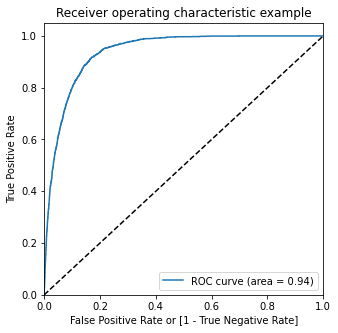

In [91]:
draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)

### Checking For Accurate Threshold Value 

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013037,27097,0,1,0,0,0,0,0,0,0,0,0
1,0,0.046616,34485,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013729,34554,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038605,15809,0,1,0,0,0,0,0,0,0,0,0
4,0,0.008389,4151,0,1,0,0,0,0,0,0,0,0,0


### Finding Acuuracy Sensitivity and Specifictiy On Different Value Of Threshold

In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082869  1.000000  0.000000
0.1   0.1  0.867632  0.860129  0.868310
0.2   0.2  0.911438  0.697860  0.930737
0.3   0.3  0.924886  0.568940  0.957048
0.4   0.4  0.930000  0.468392  0.971710
0.5   0.5  0.931279  0.377302  0.981335
0.6   0.6  0.929712  0.297163  0.986867
0.7   0.7  0.927773  0.218517  0.991859
0.8   0.8  0.924061  0.134395  0.995412
0.9   0.9  0.920059  0.055749  0.998156


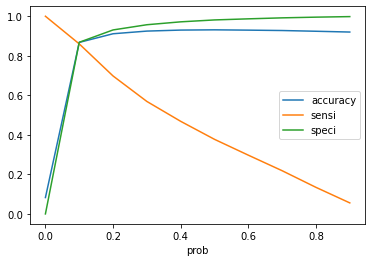

In [94]:
#plotting the above values
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### The Point where all three lines intersect is the most accurate threshold value that should be used, so in this case using 0.15 as threshold.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,y,y_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013037,27097,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.046616,34485,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013729,34554,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038605,15809,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.008389,4151,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.8676318937425236

In [97]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[19306,  2928],
       [  281,  1728]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8601294176207068

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8683097958082217

In [101]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13169020419177835


In [102]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3711340206185567


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9856537499361822


In [104]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion3

array([[19306,  2928],
       [  281,  1728]], dtype=int64)

In [105]:
#Precision TP/TP+FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6462063086104007

Precision -: High Precision Indicates Positive is indeed positive(Small FP)

In [106]:
#Recall TP/TP+FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3773021403683425

Recall -: High Recall Indicates that the class is correctly recognized.

In [107]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.6462063086104007

In [108]:
recall_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.3773021403683425

### Precision And Recall TradeOff

In [109]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.y, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 24238    0
 24239    0
 24240    0
 24241    0
 24242    0
 Name: y, Length: 24243, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 24238    0
 24239    0
 24240    0
 24241    0
 24242    0
 Name: predicted, Length: 24243, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.y, y_train_pred_final.y_Prob)

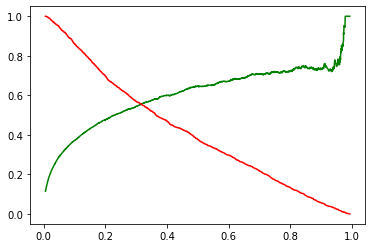

In [111]:
#plotting thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Taking the intersection as the threshold.

### Prediction On Test Data

In [112]:
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove('y')

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [113]:
X_test1 = X_test[col]
X_test1.head()

,duration,pdays,emp.var.rate,job_blue-collar,job_retired,job_student,education_basic.9y,education_university.degree,month_jul,month_mar,month_may,month_nov,month_oct,month_sep
12508,-0.059830,0.194305,0.858024,1,0,0,1,0,1,0,0,0,0,0
36109,0.327465,0.194305,-1.180005,1,0,0,1,0,0,0,1,0,0,0
24760,-0.490157,0.194305,-0.097302,0,0,0,1,0,0,0,0,1,0,0
37124,-0.497329,-5.098282,-1.880578,0,0,0,0,1,0,0,0,0,0,0
2759,0.356153,0.194305,0.666959,1,0,0,0,0,0,0,1,0,0,0


In [114]:
X_test_sm = sm.add_constant(X_test1)


y_test_pred = res.predict(X_test_sm)
y_test_pred

12508    0.006786
36109    0.026809
24760    0.009551
37124    0.617954
2759     0.003924
           ...   
6631     0.001373
13562    0.014548
14436    0.008447
16134    0.009600
1556     0.026315
Length: 10391, dtype: float64

In [115]:
y_test_pred[:10]

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
12508,0.006786
36109,0.026809
24760,0.009551
37124,0.617954
2759,0.003924


In [116]:
y_test_df = pd.DataFrame(y_test)

y_test_df['CustID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head(30)

,y,CustID,0
0,0,12508,0.006786
1,1,36109,0.026809
2,0,24760,0.009551
3,0,37124,0.617954
4,0,2759,0.003924
5,0,9373,0.034738
6,0,36405,0.155935
7,0,9257,0.027167
8,0,25133,0.067532
9,0,13672,0.032952


In [117]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'y_Prob'})

In [118]:
y_pred_final.head()

,y,CustID,y_Prob
0,0,12508,0.006786
1,1,36109,0.026809
2,0,24760,0.009551
3,0,37124,0.617954
4,0,2759,0.003924


In [119]:
y_pred_final['final_predicted'] = y_pred_final.y_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [120]:
y_pred_final.head()

,y,CustID,y_Prob,final_predicted
0,0,12508,0.006786,0
1,1,36109,0.026809,0
2,0,24760,0.009551,0
3,0,37124,0.617954,1
4,0,2759,0.003924,0


In [121]:
metrics.accuracy_score(y_pred_final.y, y_pred_final.final_predicted)

0.9233952458858627

In [122]:
confusion2 = metrics.confusion_matrix(y_pred_final.y, y_pred_final.final_predicted )
confusion2

array([[9132,  433],
       [ 363,  463]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
TP / float(TP+FN)

0.5605326876513317

In [125]:
TN / float(TN+FP)

0.9547307893361213

In [126]:
precision_score(y_pred_final.y, y_pred_final.final_predicted)

0.5167410714285714

In [127]:
recall_score(y_pred_final.y, y_pred_final.final_predicted)

0.5605326876513317